# Exercise 0 version 2

## Task 1: Recreate graphs

In [1]:
import pandas as pd

df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")

In [ ]:
# Start with just Name and Genre Tags
df_name_tags = df[['Name', 'Genre Tags']].copy()

# Split the tags into a list
df_name_tags['Genre Tags'] = df_name_tags['Genre Tags'].str.split(', ')

# Remove "+" from the tag lists
df_name_tags['Genre Tags'] = df_name_tags['Genre Tags'].apply(lambda tags: [tag for tag in tags if tag != '+'])

# Explode the list into individual rows
df_exploded = df_name_tags.explode('Genre Tags')

# Optional: strip whitespace just in case
df_exploded['Genre Tags'] = df_exploded['Genre Tags'].str.strip()

# Set Name as index (if you want)
df_exploded = df_exploded.set_index('Name')

In [3]:
df_exploded

,Genre Tags
Name,
Counter-Strike 2,FPS
Counter-Strike 2,Shooter
Counter-Strike 2,Multiplayer
Counter-Strike 2,Competitive
Counter-Strike 2,Action
...,...
Unturned,Massively Multiplayer
Unturned,Indie
Unturned,Atmospheric


In [4]:
import duckdb

df_tag_counts = duckdb.query("""--sql
    SELECT 
        "Genre Tags" AS unique_tag,
        COUNT(*) AS count_tag
    FROM df_exploded
    GROUP BY "Genre Tags"
    ORDER BY count_tag DESC 
    
""").to_df()

df_tag_counts

,unique_tag,count_tag
0,+,82
1,Multiplayer,71
2,Action,64
3,Singleplayer,55
4,Open World,45
...,...,...
249,Warhammer 40K,1
250,Social Deduction,1
251,Conversation,1
252,Turn-Based Combat,1


In [5]:
tag_counts_top5 = df_tag_counts.iloc[0:5].set_index("unique_tag")
tag_counts_top5

,count_tag
unique_tag,
+,82
Multiplayer,71
Action,64
Singleplayer,55
Open World,45


In [6]:
# Count the number of tags for each game
df_name_tags['Num Tags'] = df_name_tags['Genre Tags'].apply(len)
df_name_tags

,Name,Genre Tags,Num Tags
0,Counter-Strike 2,"[FPS, Shooter, Multiplayer, Competitive, A...",21
1,PUBG: BATTLEGROUNDS,"[Survival, Shooter, Battle Royale, Multipla...",21
2,Dota 2,"[Free to Play, MOBA, Multiplayer, Strategy,...",21
3,Marvel Rivals,"[Free to Play, Multiplayer, Hero Shooter, T...",21
4,Path of Exile 2,"[Action RPG, Hack and Slash, RPG, Action, ...",21
...,...,...,...
95,Sid Meier's Civilization® V,"[Turn-Based Strategy, Strategy, Turn-Based, ...",21
96,Counter-Strike,"[Action, FPS, Multiplayer, Shooter, Classi...",21
97,Cities: Skylines,"[City Builder, Simulation, Building, Manage...",21
98,Fallout 4,"[Open World, Post-apocalyptic, Singleplayer,...",4


(array([ 3., 14.,  1.,  0.,  2.,  0.,  1.,  0.,  0., 79.]),
 array([ 2. ,  3.9,  5.8,  7.7,  9.6, 11.5, 13.4, 15.3, 17.2, 19.1, 21. ]),
 <BarContainer object of 10 artists>)

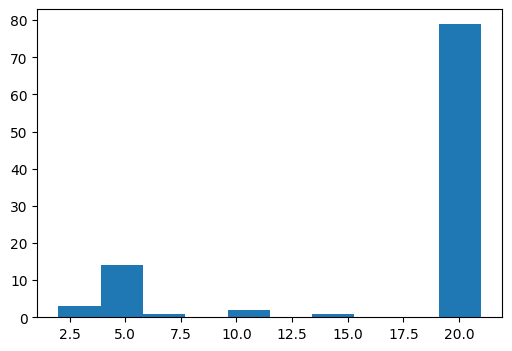

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(df_name_tags["Num Tags"])